In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_excel("cleaned_data/cleaned_table_11a.xlsx")

df.head()

,Ethnic Group,Referrals Received,Entered Treatment,Completing Treatment,Referrals Received - Male,Entered Treatment - Male,Completing Treatment - Male,Referrals Received - Female,Entered Treatment - Female,Completing Treatment - Female
0,Asian or Asian British - Any Other Asian Backg...,9832,7232,3696,4016,2872,1420,5677,4284,2253
1,Asian or Asian British - Bangladeshi,4758,3539,1316,1718,1270,504,3007,2252,808
2,Asian or Asian British - Indian,17838,13733,7263,6238,4748,2541,11443,8912,4706
3,Asian or Asian British - Pakistani,14015,9828,4521,5071,3514,1610,8725,6212,2880
4,Black or Black British - African,9192,6633,3330,3047,2151,1019,6071,4444,2303


In [19]:
# Ensure numeric
num_cols = [
    "Referrals Received",
    "Entered Treatment",
    "Completing Treatment",
    "Referrals Received - Male",
    "Entered Treatment - Male",
    "Completing Treatment - Male",
    "Referrals Received - Female",
    "Entered Treatment - Female",
    "Completing Treatment - Female",
]
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors="coerce")

df.head()


,Ethnic Group,Referrals Received,Entered Treatment,Completing Treatment,Referrals Received - Male,Entered Treatment - Male,Completing Treatment - Male,Referrals Received - Female,Entered Treatment - Female,Completing Treatment - Female
0,Asian or Asian British - Any Other Asian Backg...,9832,7232,3696,4016,2872,1420,5677,4284,2253
1,Asian or Asian British - Bangladeshi,4758,3539,1316,1718,1270,504,3007,2252,808
2,Asian or Asian British - Indian,17838,13733,7263,6238,4748,2541,11443,8912,4706
3,Asian or Asian British - Pakistani,14015,9828,4521,5071,3514,1610,8725,6212,2880
4,Black or Black British - African,9192,6633,3330,3047,2151,1019,6071,4444,2303


In [20]:
# -------------------------------------------------------
# 2. NATIONAL TOTALS & GENDER SUMMARY
# -------------------------------------------------------
national_received = df["Referrals Received"].sum()
national_entered = df["Entered Treatment"].sum()
national_completed = df["Completing Treatment"].sum()

national_entry_rate = national_entered / national_received * 100
national_completion_rate = national_completed / national_entered * 100

# Gender totals (using exact column names from Table 11a)
male_received = df["Referrals Received - Male"].sum()
male_entered  = df["Entered Treatment - Male"].sum()
male_completed = df["Completing Treatment - Male"].sum()

female_received = df["Referrals Received - Female"].sum()
female_entered  = df["Entered Treatment - Female"].sum()
female_completed = df["Completing Treatment - Female"].sum()

male_entry_rate = male_entered / male_received * 100
male_completion_rate = male_completed / male_entered * 100

female_entry_rate = female_entered / female_received * 100
female_completion_rate = female_completed / female_entered * 100

print("---- NATIONAL SUMMARY (All Ethnic Groups) ----")
print(f"Total referrals received: {national_received:,}")
print(f"Total entered treatment: {national_entered:,}")
print(f"Total completed treatment: {national_completed:,}")
print(f"National entry rate: {national_entry_rate:.2f}%")
print(f"National completion rate: {national_completion_rate:.2f}%\n")

print("---- Gender Summary ----")
print(f"Male referrals received: {male_received:,}")
print(f"Female referrals received: {female_received:,}")
print(f"Male share of referrals: {male_received / (male_received + female_received) * 100:.2f}%")
print(f"Female share of referrals: {female_received / (male_received + female_received) * 100:.2f}%\n")
print(f"Male entry rate: {male_entry_rate:.2f}%")
print(f"Female entry rate: {female_entry_rate:.2f}%")
print(f"Male completion rate: {male_completion_rate:.2f}%")
print(f"Female completion rate: {female_completion_rate:.2f}%")

---- NATIONAL SUMMARY (All Ethnic Groups) ----
Total referrals received: 972,436
Total entered treatment: 719,369
Total completed treatment: 419,287
National entry rate: 73.98%
National completion rate: 58.29%

---- Gender Summary ----
Male referrals received: 344,802
Female referrals received: 620,200
Male share of referrals: 35.73%
Female share of referrals: 64.27%

Male entry rate: 73.12%
Female entry rate: 74.68%
Male completion rate: 57.80%
Female completion rate: 58.78%


In [28]:
# -------------------------------------------------------
# 3. ETHNIC GROUP SUMMARY (overall rates by ethnic group)
# -------------------------------------------------------
ethnic_summary = df.groupby("Ethnic Group").agg({
    "Referrals Received": "sum",
    "Entered Treatment": "sum",
    "Completing Treatment": "sum"
})

ethnic_summary["Entry_Rate"] = (
    ethnic_summary["Entered Treatment"] / ethnic_summary["Referrals Received"] * 100
)
ethnic_summary["Completion_Rate"] = (
    ethnic_summary["Completing Treatment"] / ethnic_summary["Entered Treatment"] * 100
)
ethnic_summary["Referrals Received (%)"] = (
    ethnic_summary["Referrals Received"] / national_received * 100
)

print("\n---- Ethnic Group Summary (overall) ----")
display(ethnic_summary)

# -------------------------------------------------------
#print Referrals by Ethnic Group
print("\n---- Referrals by Ethnic Group ----")
referrals_ethnic =  ethnic_summary[["Referrals Received (%)"]].copy()
print(referrals_ethnic)


---- Ethnic Group Summary (overall) ----


,Referrals Received,Entered Treatment,Completing Treatment,Entry_Rate,Completion_Rate,Referrals Received (%)
Ethnic Group,,,,,,
Asian or Asian British - Any Other Asian Background,9832,7232,3696,73.555736,51.106195,1.011069
Asian or Asian British - Bangladeshi,4758,3539,1316,74.379992,37.185646,0.489287
Asian or Asian British - Indian,17838,13733,7263,76.987330,52.887206,1.834362
Asian or Asian British - Pakistani,14015,9828,4521,70.124866,46.001221,1.441226
Black or Black British - African,9192,6633,3330,72.160574,50.203528,0.945255
Black or Black British - Any Other Black Background,4868,3211,1627,65.961380,50.669573,0.500598
Black or Black British - Caribbean,14149,10406,5222,73.545834,50.182587,1.455006
Mixed - Any Other Mixed Background,8777,6168,3341,70.274581,54.166667,0.902579
Mixed - White and Asian,3322,2480,1378,74.653823,55.564516,0.341616



---- Referrals by Ethnic Group ----
                                                    Referrals Received (%)
Ethnic Group                                                              
Asian or Asian British - Any Other Asian Backgr...                1.011069
Asian or Asian British - Bangladeshi                              0.489287
Asian or Asian British - Indian                                   1.834362
Asian or Asian British - Pakistani                                1.441226
Black or Black British - African                                  0.945255
Black or Black British - Any Other Black Backgr...                0.500598
Black or Black British - Caribbean                                1.455006
Mixed - Any Other Mixed Background                                0.902579
Mixed - White and Asian                                           0.341616
Mixed - White and Black African                                   0.191786
Mixed - White and Black Caribbean                              

In [22]:
ethnic_gender = df.groupby("Ethnic Group").agg({
    "Referrals Received - Male": "sum",
    "Referrals Received - Female": "sum",
    "Entered Treatment - Male": "sum",
    "Entered Treatment - Female": "sum",
    "Completing Treatment - Male": "sum",
    "Completing Treatment - Female": "sum",
})

# Rates within each ethnic group
ethnic_gender["Male Entry Rate"] = (
    ethnic_gender["Entered Treatment - Male"] / ethnic_gender["Referrals Received - Male"] * 100
)
ethnic_gender["Female Entry Rate"] = (
    ethnic_gender["Entered Treatment - Female"] / ethnic_gender["Referrals Received - Female"] * 100
)

ethnic_gender["Male Completion Rate"] = (
    ethnic_gender["Completing Treatment - Male"] / ethnic_gender["Entered Treatment - Male"] * 100
)
ethnic_gender["Female Completion Rate"] = (
    ethnic_gender["Completing Treatment - Female"] / ethnic_gender["Entered Treatment - Female"] * 100
)

print("\n---- Ethnic Group × Gender Summary ----")
display(ethnic_gender)


---- Ethnic Group × Gender Summary ----


,Referrals Received - Male,Referrals Received - Female,Entered Treatment - Male,Entered Treatment - Female,Completing Treatment - Male,Completing Treatment - Female,Male Entry Rate,Female Entry Rate,Male Completion Rate,Female Completion Rate
Ethnic Group,,,,,,,,,,
Asian or Asian British - Any Other Asian Background,4016,5677,2872,4284,1420,2253,71.513944,75.462392,49.442897,52.591036
Asian or Asian British - Bangladeshi,1718,3007,1270,2252,504,808,73.923166,74.891919,39.685039,35.879218
Asian or Asian British - Indian,6238,11443,4748,8912,2541,4706,76.114139,77.881674,53.517270,52.805206
Asian or Asian British - Pakistani,5071,8725,3514,6212,1610,2880,69.295997,71.197708,45.816733,46.361880
Black or Black British - African,3047,6071,2151,4444,1019,2303,70.594027,73.200461,47.373315,51.822682
Black or Black British - Any Other Black Background,1644,3172,1005,2182,488,1132,61.131387,68.789407,48.557214,51.879010
Black or Black British - Caribbean,4282,9753,3050,7292,1440,3768,71.228398,74.766738,47.213115,51.673066
Mixed - Any Other Mixed Background,2856,5844,1952,4169,1029,2300,68.347339,71.338125,52.715164,55.169105
Mixed - White and Asian,1113,2169,832,1624,455,916,74.752920,74.873213,54.687500,56.403941


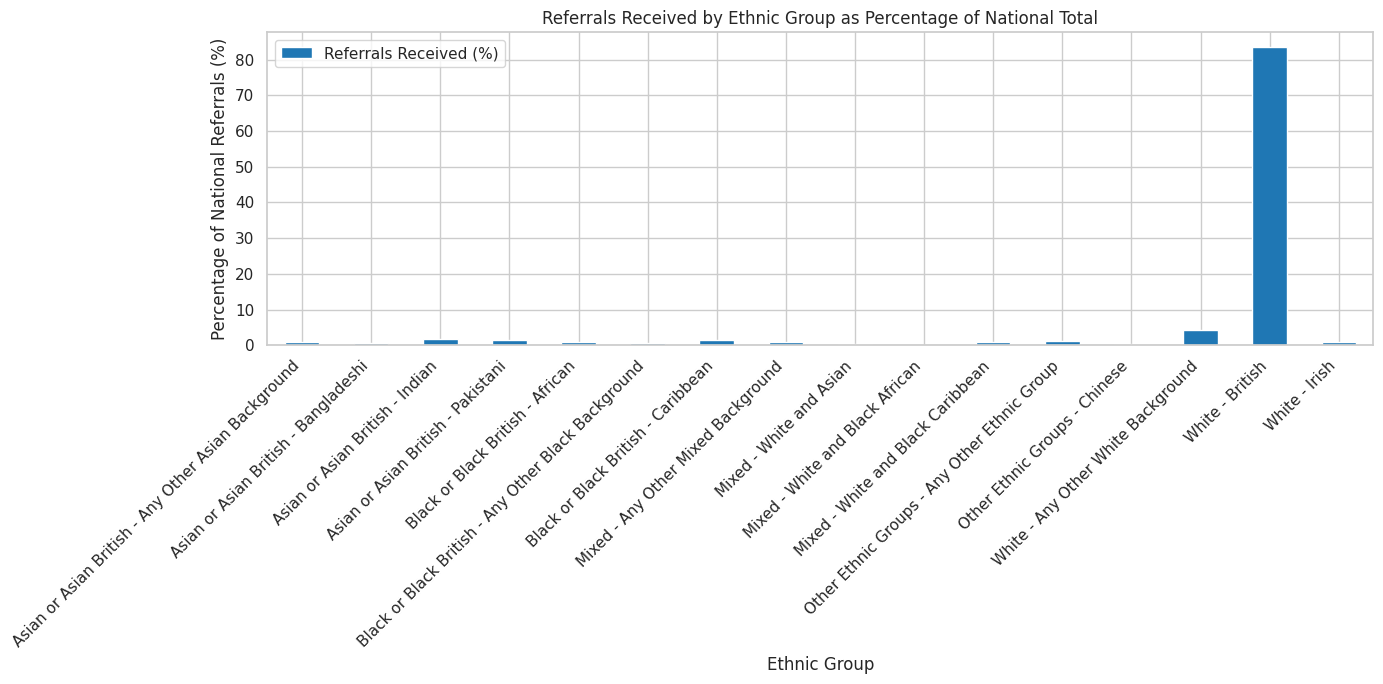

In [29]:
#Referrals by Ethnic Group Percentage

#Referrals Received for each Ethnic Group as Percentage of National Total
referrals_ethnic_pct = ethnic_summary[
    ["Referrals Received (%)"]
].copy()

referrals_ethnic_pct.plot(
    kind="bar",
    figsize=(14, 7),
    colormap="tab20"
)

plt.title("Referrals Received by Ethnic Group as Percentage of National Total")
plt.ylabel("Percentage of National Referrals (%)")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

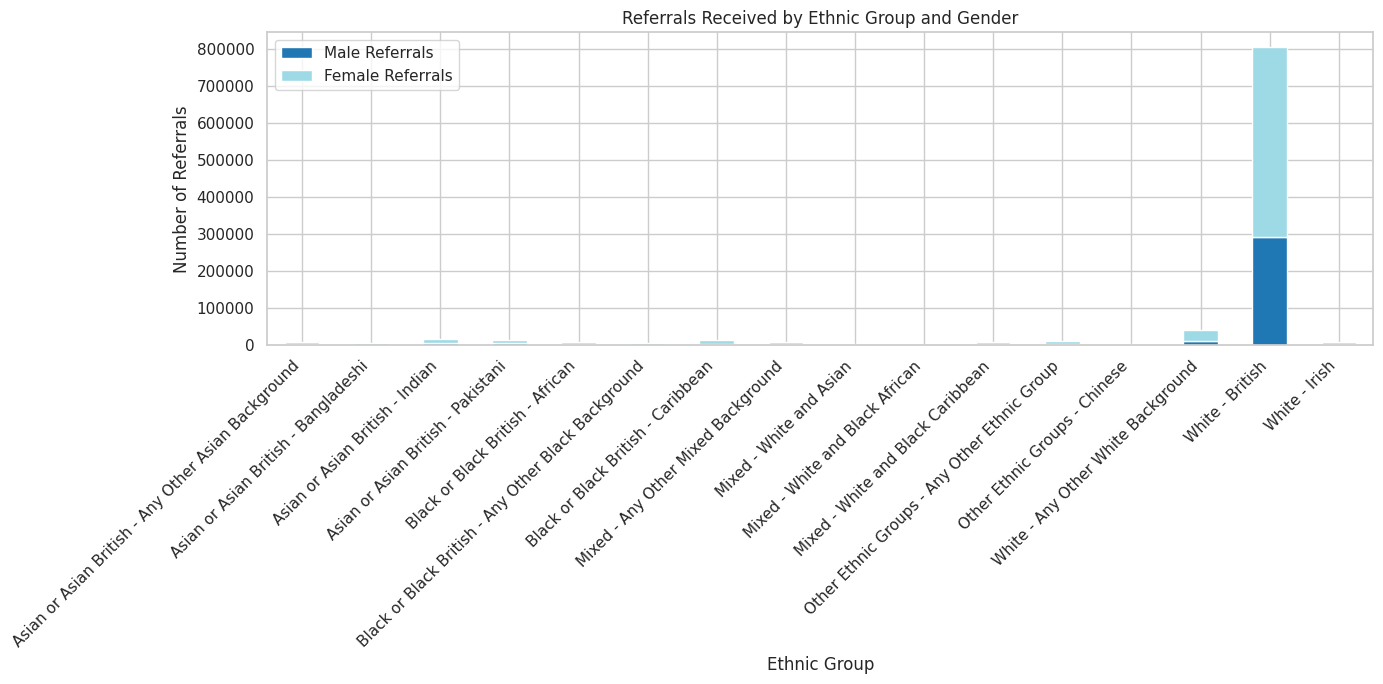

In [ ]:
#Referrals by Ethnic Group × Gender
referrals_ethnic_gender = ethnic_gender[
    ["Referrals Received - Male", "Referrals Received - Female"]
].copy()
referrals_ethnic_gender.columns = ["Male Referrals", "Female Referrals"]

referrals_ethnic_gender.plot(
    kind="bar",
    stacked=True,
    figsize=(14, 7),
    colormap="tab20"
)
plt.title("Referrals Received by Ethnic Group and Gender")
plt.ylabel("Number of Referrals")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

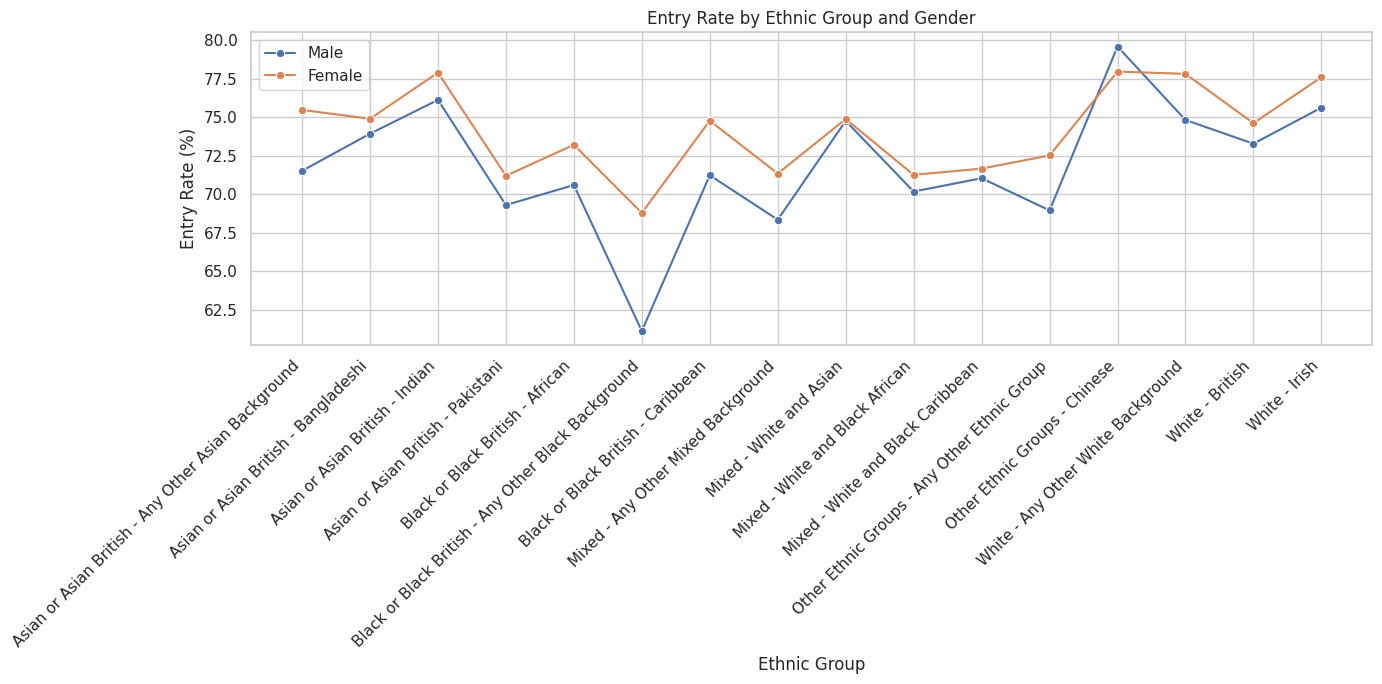

In [ ]:
# 5.2 Entry Rate by Ethnic Group × Gender
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=ethnic_gender.reset_index(),
    x="Ethnic Group",
    y="Male Entry Rate",
    marker="o",
    label="Male"
)
sns.lineplot(
    data=ethnic_gender.reset_index(),
    x="Ethnic Group",
    y="Female Entry Rate",
    marker="o",
    label="Female"
)
plt.title("Entry Rate by Ethnic Group and Gender")
plt.ylabel("Entry Rate (%)")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

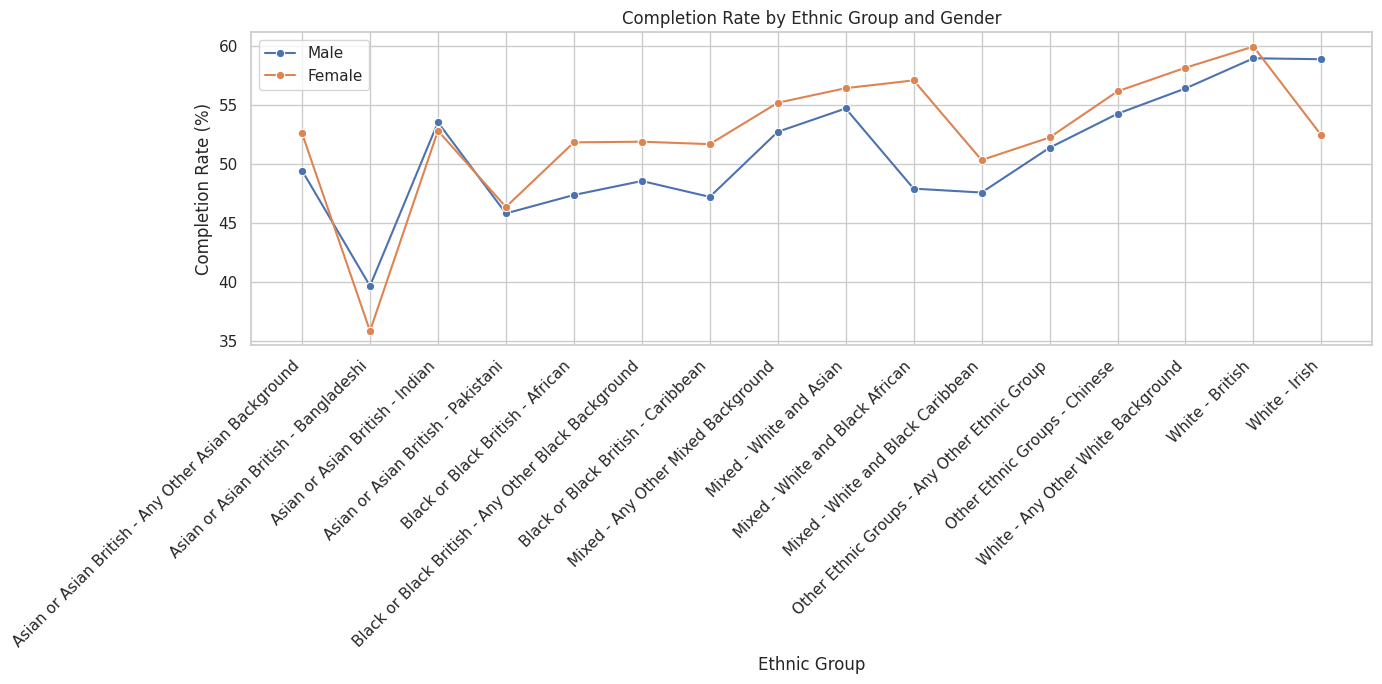

In [ ]:
# Completion Rate by Ethnic Group × Gender
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=ethnic_gender.reset_index(),
    x="Ethnic Group",
    y="Male Completion Rate",
    marker="o",
    label="Male"
)
sns.lineplot(
    data=ethnic_gender.reset_index(),
    x="Ethnic Group",
    y="Female Completion Rate",
    marker="o",
    label="Female"
)
plt.title("Completion Rate by Ethnic Group and Gender")
plt.ylabel("Completion Rate (%)")
plt.xlabel("Ethnic Group")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()